In [123]:
import numpy as np
import matplotlib.pyplot as plt
import getdist
from getdist import plots, MCSamples
%matplotlib inline
from scipy.integrate import quad, dblquad

import scipy as sp

# Let's do some simple test: 

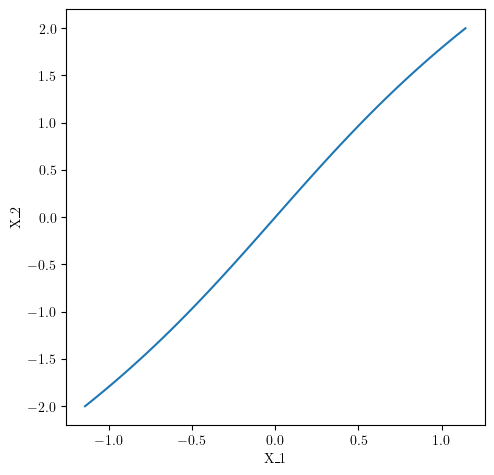

In [555]:
def model(theta):
    return np.array([theta+1/7*theta**3,2*theta])

def deriv_model(theta):
    return np.array([1+1/7*3*theta**2,2])

Theta=np.linspace(-1,1,50)
plt.plot(model(Theta)[0],model(Theta)[1])

plt.xlabel('X_1')
plt.ylabel('X_2')

plt.show()

In [556]:
mean_prior=0
sig_prior=1
sigma_likelihood=1
n_samples=1
cov = np.eye(2) * sigma_likelihood**2

all_samples = np.empty((0, 2))
for j in range(1000):
    theta0 = np.random.normal(mean_prior,sig_prior)
    #print(theta0)
    X_0=model(theta0)
    mean = X_0
    #print(X_0)
    samples = np.random.multivariate_normal(mean, cov, size=n_samples)
    all_samples = np.vstack((all_samples, samples))



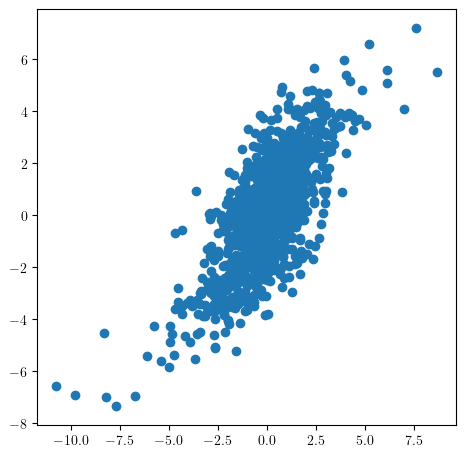

In [557]:
plt.scatter(all_samples[:,0],all_samples[:,1])

In [558]:
sigma_likelihood=1
cov = np.eye(2) * sigma_likelihood**2



def model_linear(theta,theta_0,model):
    M=deriv_model(theta_0)
    return model(theta_0)+M*(theta-theta_0)



# Let's start: 

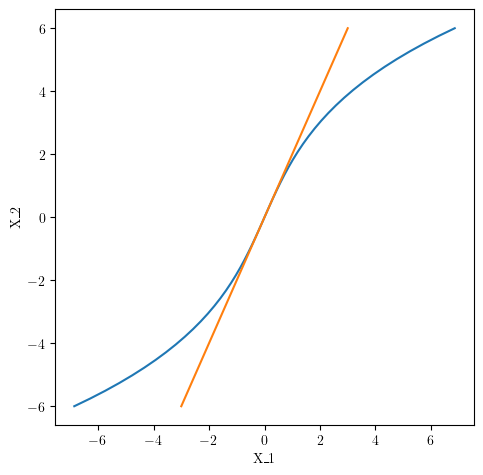

In [559]:
Theta=np.linspace(-3,3,50)
plt.plot(model(Theta)[0],model(Theta)[1])
model_linear_vec=np.array([model_linear(theta,mean_prior,model) for theta in Theta])

plt.plot(model_linear_vec[:,0],model_linear_vec[:,1])

plt.xlabel('X_1')
plt.ylabel('X_2')

plt.show()

In [560]:
def Gaussian(theta):
    mean,sigma=0,2
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((theta - mean) / sigma) ** 2)

def Uniform(theta):
    min_theta=-3
    max_theta=3
    if ((theta>=min_theta) and (theta<=max_theta)):
        return 1 / (max_theta-min_theta)
    return 0


def Evidence(x,prior_funct):
    theta_min=-5
    theta_max=5
    inv_sqrt_det=1/(abs(np.linalg.det(cov)))**0.5
    def function_to_int(theta):
        return prior_funct(theta)*np.exp(-0.5*np.transpose(x- model(theta))@np.linalg.inv(cov)@(x- model(theta)))* inv_sqrt_det/(2*np.pi)
    return quad(function_to_int, theta_min, theta_max,epsrel=10**(-3),epsabs=10**(-4),limit=100)[0]

def Evidence_linear(x,prior_funct):
    theta_min=-10
    theta_max=10
    inv_sqrt_det=1/(abs(np.linalg.det(cov)))**0.5
    theta_0=0
    def function_to_int(theta):
        return prior_funct(theta)*np.exp(-0.5*np.transpose(x-model_linear(theta,theta_0,model))@np.linalg.inv(cov)@(x-model_linear(theta,theta_0,model)))* inv_sqrt_det/(2*np.pi)
    return quad(function_to_int, theta_min, theta_max,epsrel=10**(-3),epsabs=10**(-4),limit=100)[0]

    

In [561]:
Evidence(x=np.array([0,2]),prior_funct=Gaussian)

0.018779384376813268

In [562]:
Evidence(x=np.array([0,2]),prior_funct=Uniform)

0.01700458818998319

In [563]:
X=[-10+k*0.5 for k in range(41)]

Evidence_Gauss_map=[[Evidence(x=np.array([x1,x2]),prior_funct=Gaussian) for x1 in X] for x2 in X]
Evidence_linear_Gauss_map=[[Evidence_linear(x=np.array([x1,x2]),prior_funct=Gaussian) for x1 in X] for x2 in X]


In [564]:
Evidence_Unif_map=[[Evidence(x=np.array([x1,x2]),prior_funct=Uniform) for x1 in X] for x2 in X]
Evidence_linear_Unif_map=[[Evidence_linear(x=np.array([x1,x2]),prior_funct=Uniform) for x1 in X] for x2 in X]


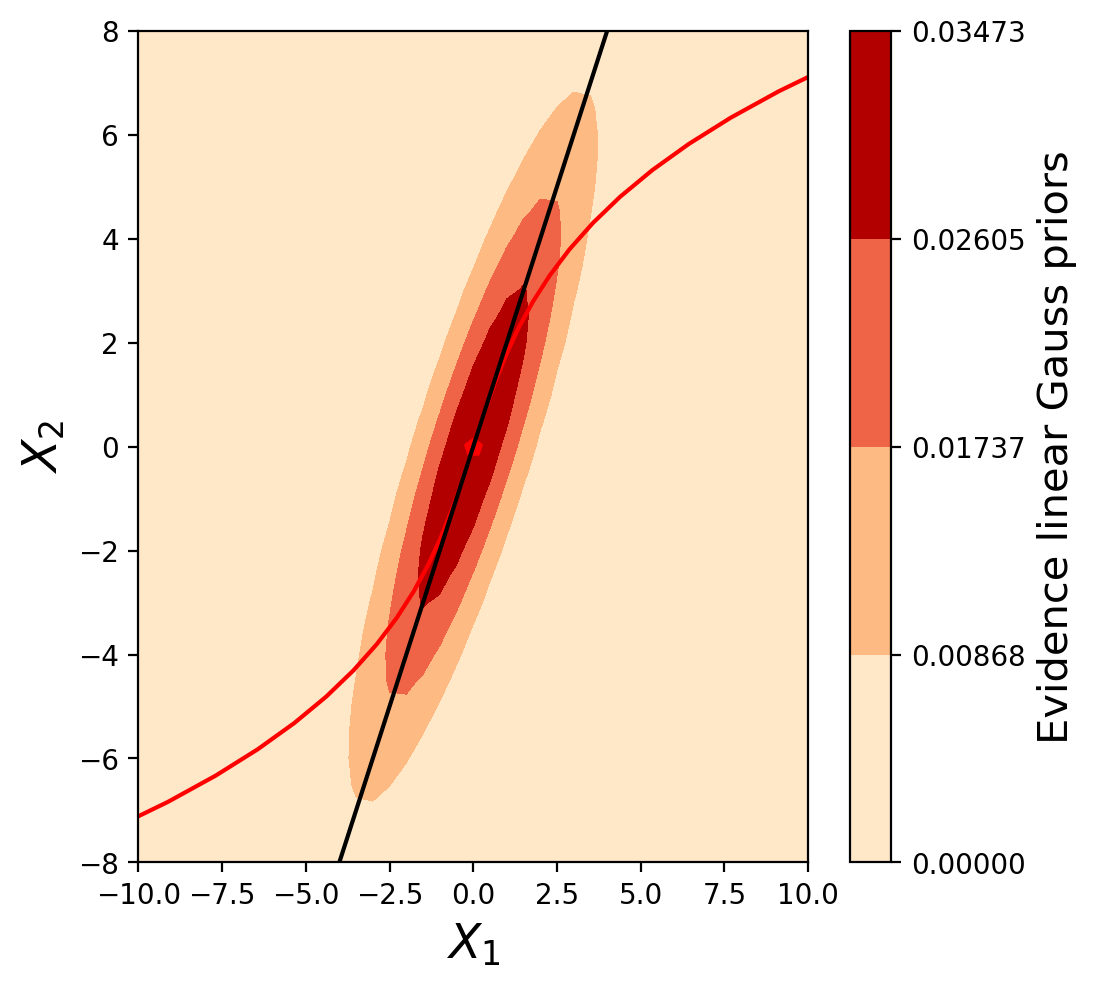

In [565]:
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 5.4, 5.4 # sets plot size
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
#levels = np.array([0.9,0.93,0.95,0.97,1,1.03,1.07,1.2,1.4,1.6])

Evid=Evidence_linear_Gauss_map

levels = np.array([0,np.max(Evid)/4,np.max(Evid)/2,np.max(Evid)*3/4,np.max(Evid)])


cpf = ax.contourf(X,X, Evid, len(levels), levels=levels, cmap='OrRd',vmin=0, vmax=np.max(Evid))


cb=plt.colorbar(cpf)
cb.set_label(label=r'Evidence linear Gauss priors', fontsize=15)#, weight='bold')

xlim=[-10,10]
ax.set_xlim(xlim)
ax.set_ylim(-8,8)

ax.set_xlabel('$X_1$',fontsize=17)
ax.set_ylabel('$X_2$',fontsize=17)

#line_colors = ['black' for l in cpf.levels]
#cp = ax.contour(X,X, np.transpose(CDF_X2cX1), levels=levels, colors=line_colors)


Theta=np.linspace(-10,10,80)
plt.plot(model(Theta)[0],model(Theta)[1],color='red')
model_linear_vec=np.array([model_linear(theta,mean_prior,model) for theta in Theta])

plt.plot(model_linear_vec[:,0],model_linear_vec[:,1],color='black')

plt.scatter(model(0)[0],model(0)[1],marker='p',color='red')


plt.savefig('U2_X2X1.png',bbox_inches='tight')

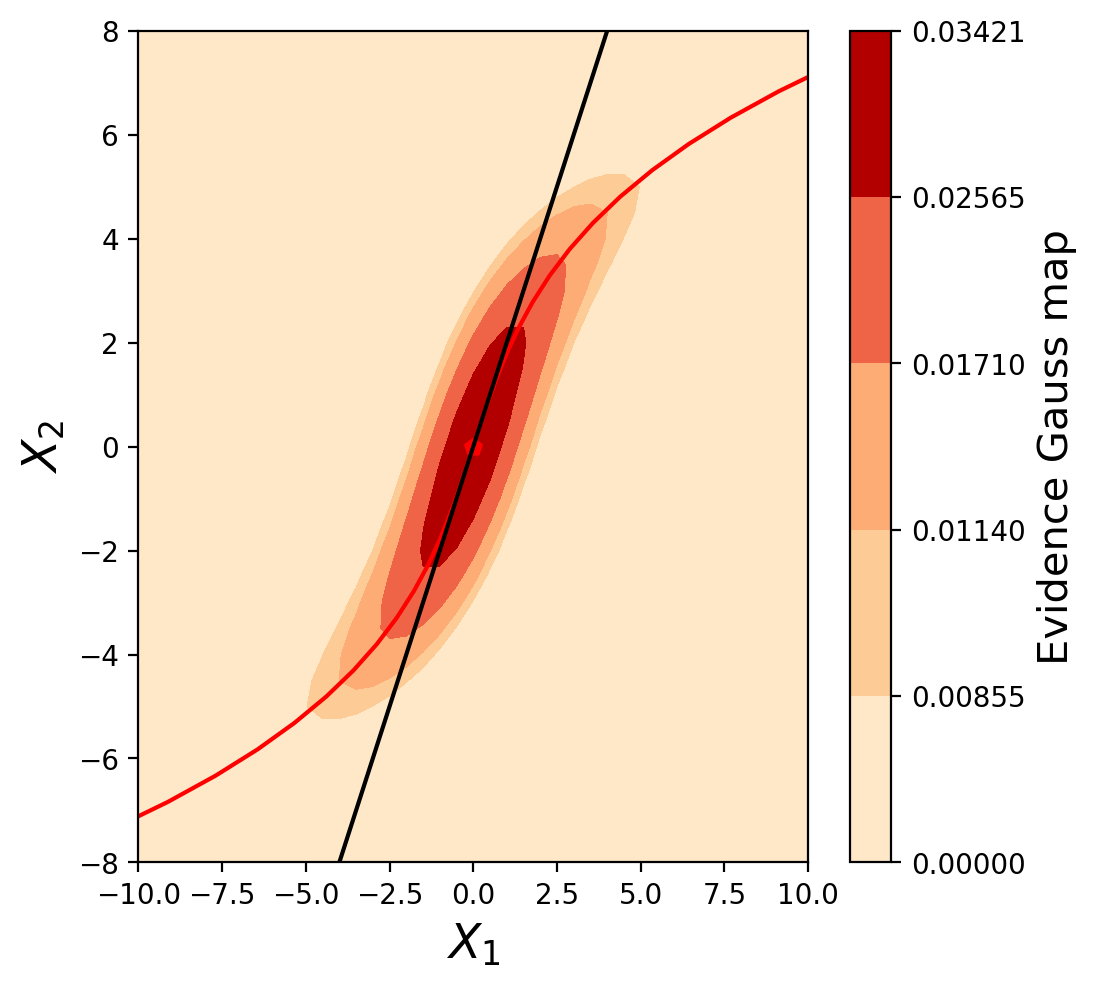

In [566]:
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 5.4, 5.4 # sets plot size
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
#levels = np.array([0.9,0.93,0.95,0.97,1,1.03,1.07,1.2,1.4,1.6])

Evid=Evidence_Gauss_map

levels = np.array([0,np.max(Evid)/4,np.max(Evid)/3,np.max(Evid)/2,np.max(Evid)*3/4,np.max(Evid)])


cpf = ax.contourf(X,X, Evid, len(levels), levels=levels, cmap='OrRd',vmin=0, vmax=np.max(Evid))


cb=plt.colorbar(cpf)
cb.set_label(label=r'Evidence Gauss map', fontsize=15)#, weight='bold')

xlim=[-10,10]
ax.set_xlim(xlim)
ax.set_ylim(-8,8)

ax.set_xlabel('$X_1$',fontsize=17)
ax.set_ylabel('$X_2$',fontsize=17)

#line_colors = ['black' for l in cpf.levels]
#cp = ax.contour(X,X, np.transpose(CDF_X2cX1), levels=levels, colors=line_colors)


Theta=np.linspace(-10,10,80)
plt.plot(model(Theta)[0],model(Theta)[1],color='red')
model_linear_vec=np.array([model_linear(theta,mean_prior,model) for theta in Theta])

plt.plot(model_linear_vec[:,0],model_linear_vec[:,1],color='black')

plt.scatter(model(0)[0],model(0)[1],marker='p',color='red')


plt.savefig('U2_X2X1.png',bbox_inches='tight')

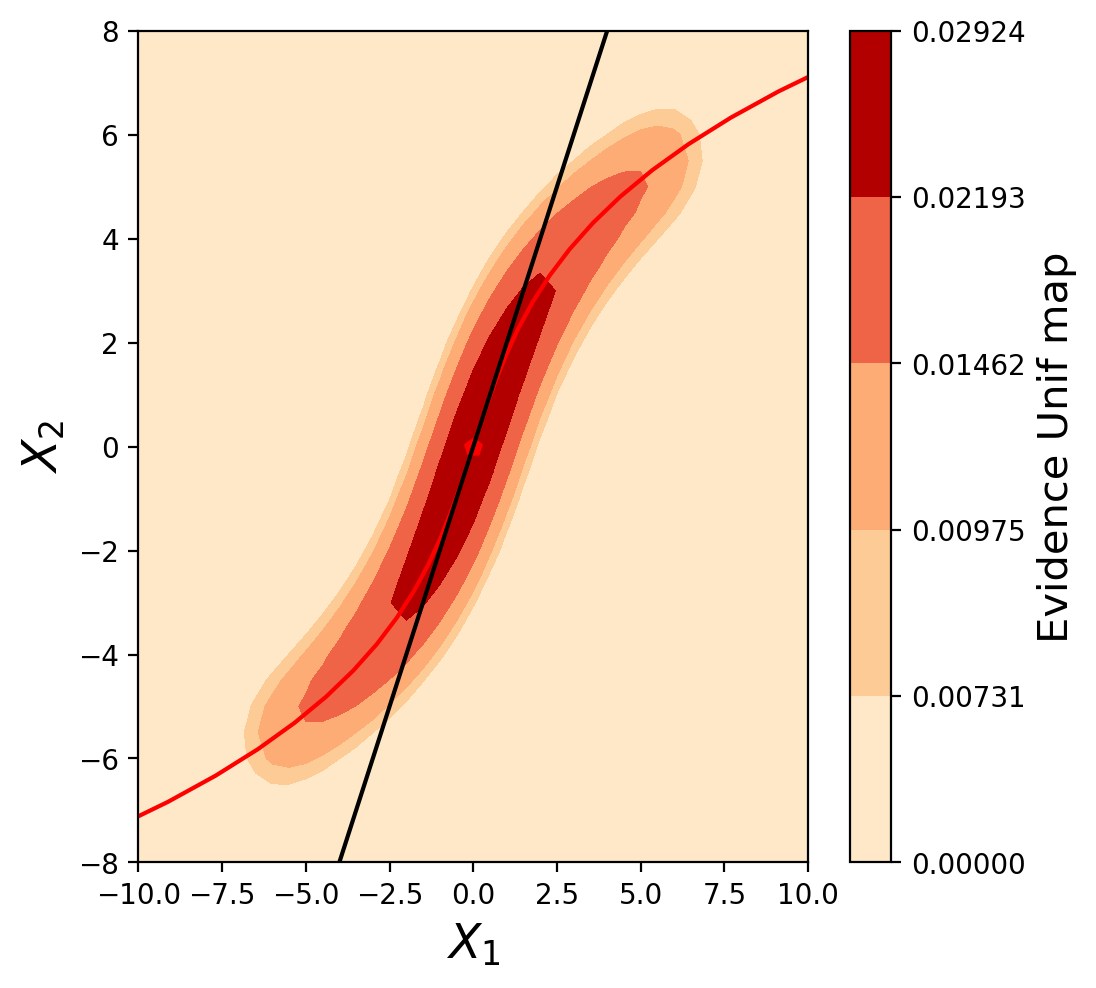

In [567]:
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 5.4, 5.4 # sets plot size
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
#levels = np.array([0.9,0.93,0.95,0.97,1,1.03,1.07,1.2,1.4,1.6])

Evid=Evidence_Unif_map

levels = np.array([0,np.max(Evid)/4,np.max(Evid)/3,np.max(Evid)/2,np.max(Evid)*3/4,np.max(Evid)])


cpf = ax.contourf(X,X, Evid, len(levels), levels=levels, cmap='OrRd',vmin=0, vmax=np.max(Evid))


cb=plt.colorbar(cpf)
cb.set_label(label=r'Evidence Unif map', fontsize=15)#, weight='bold')

xlim=[-10,10]
ax.set_xlim(xlim)
ax.set_ylim(-8,8)

ax.set_xlabel('$X_1$',fontsize=17)
ax.set_ylabel('$X_2$',fontsize=17)

#line_colors = ['black' for l in cpf.levels]
#cp = ax.contour(X,X, np.transpose(CDF_X2cX1), levels=levels, colors=line_colors)


Theta=np.linspace(-10,10,80)
plt.plot(model(Theta)[0],model(Theta)[1],color='red')
model_linear_vec=np.array([model_linear(theta,mean_prior,model) for theta in Theta])

plt.plot(model_linear_vec[:,0],model_linear_vec[:,1],color='black')

plt.scatter(model(0)[0],model(0)[1],marker='p',color='red')


plt.savefig('U2_X2X1.png',bbox_inches='tight')

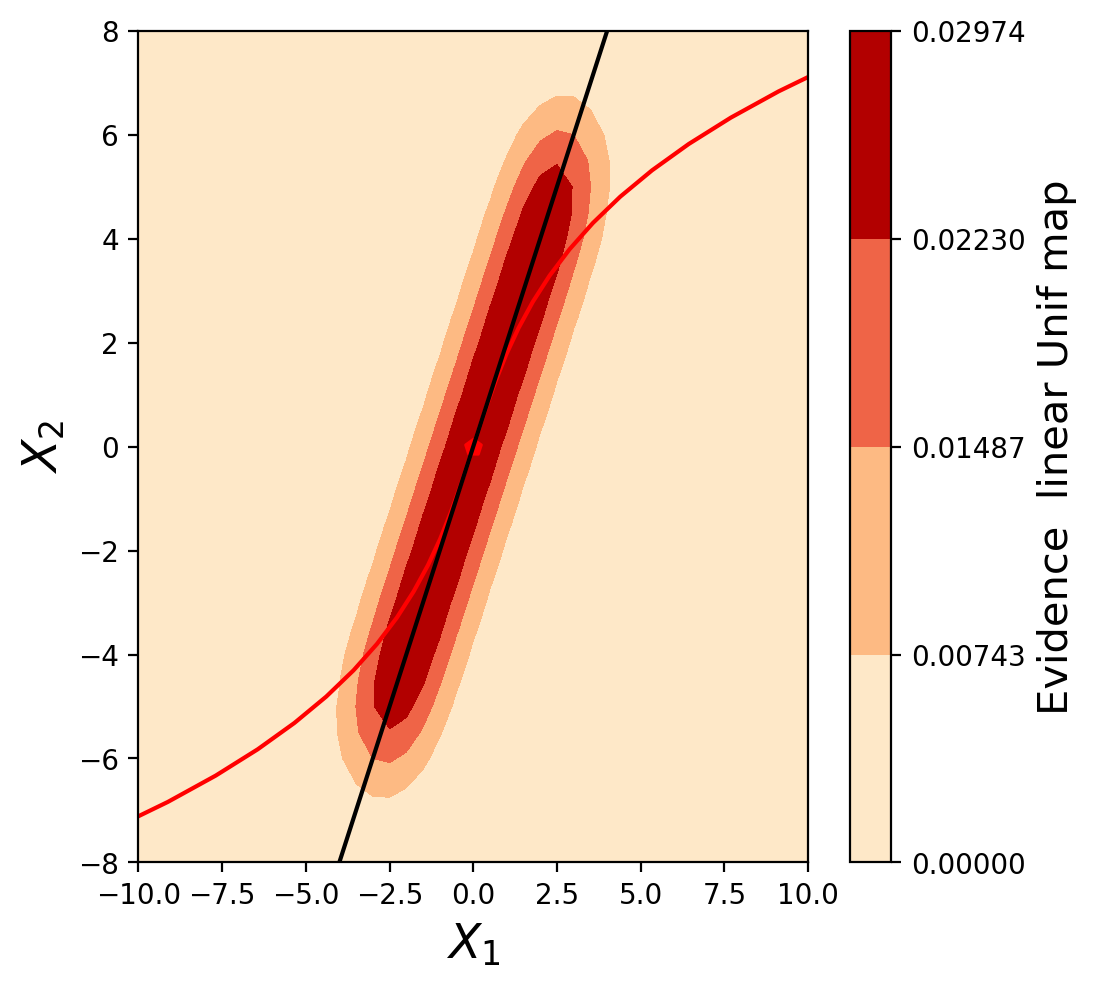

In [568]:
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 5.4, 5.4 # sets plot size
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
#levels = np.array([0.9,0.93,0.95,0.97,1,1.03,1.07,1.2,1.4,1.6])

Evid=Evidence_linear_Unif_map

levels = np.array([0,np.max(Evid)/4,np.max(Evid)/2,np.max(Evid)*3/4,np.max(Evid)])


cpf = ax.contourf(X,X, Evid, len(levels), levels=levels, cmap='OrRd',vmin=0, vmax=np.max(Evid))


cb=plt.colorbar(cpf)
cb.set_label(label=r'Evidence  linear Unif map', fontsize=15)#, weight='bold')

xlim=[-10,10]
ax.set_xlim(xlim)
ax.set_ylim(-8,8)

ax.set_xlabel('$X_1$',fontsize=17)
ax.set_ylabel('$X_2$',fontsize=17)

#line_colors = ['black' for l in cpf.levels]
#cp = ax.contour(X,X, np.transpose(CDF_X2cX1), levels=levels, colors=line_colors)


Theta=np.linspace(-10,10,80)
plt.plot(model(Theta)[0],model(Theta)[1],color='red')
model_linear_vec=np.array([model_linear(theta,mean_prior,model) for theta in Theta])

plt.plot(model_linear_vec[:,0],model_linear_vec[:,1],color='black')

plt.scatter(model(0)[0],model(0)[1],marker='p',color='red')


plt.savefig('U2_X2X1.png',bbox_inches='tight')

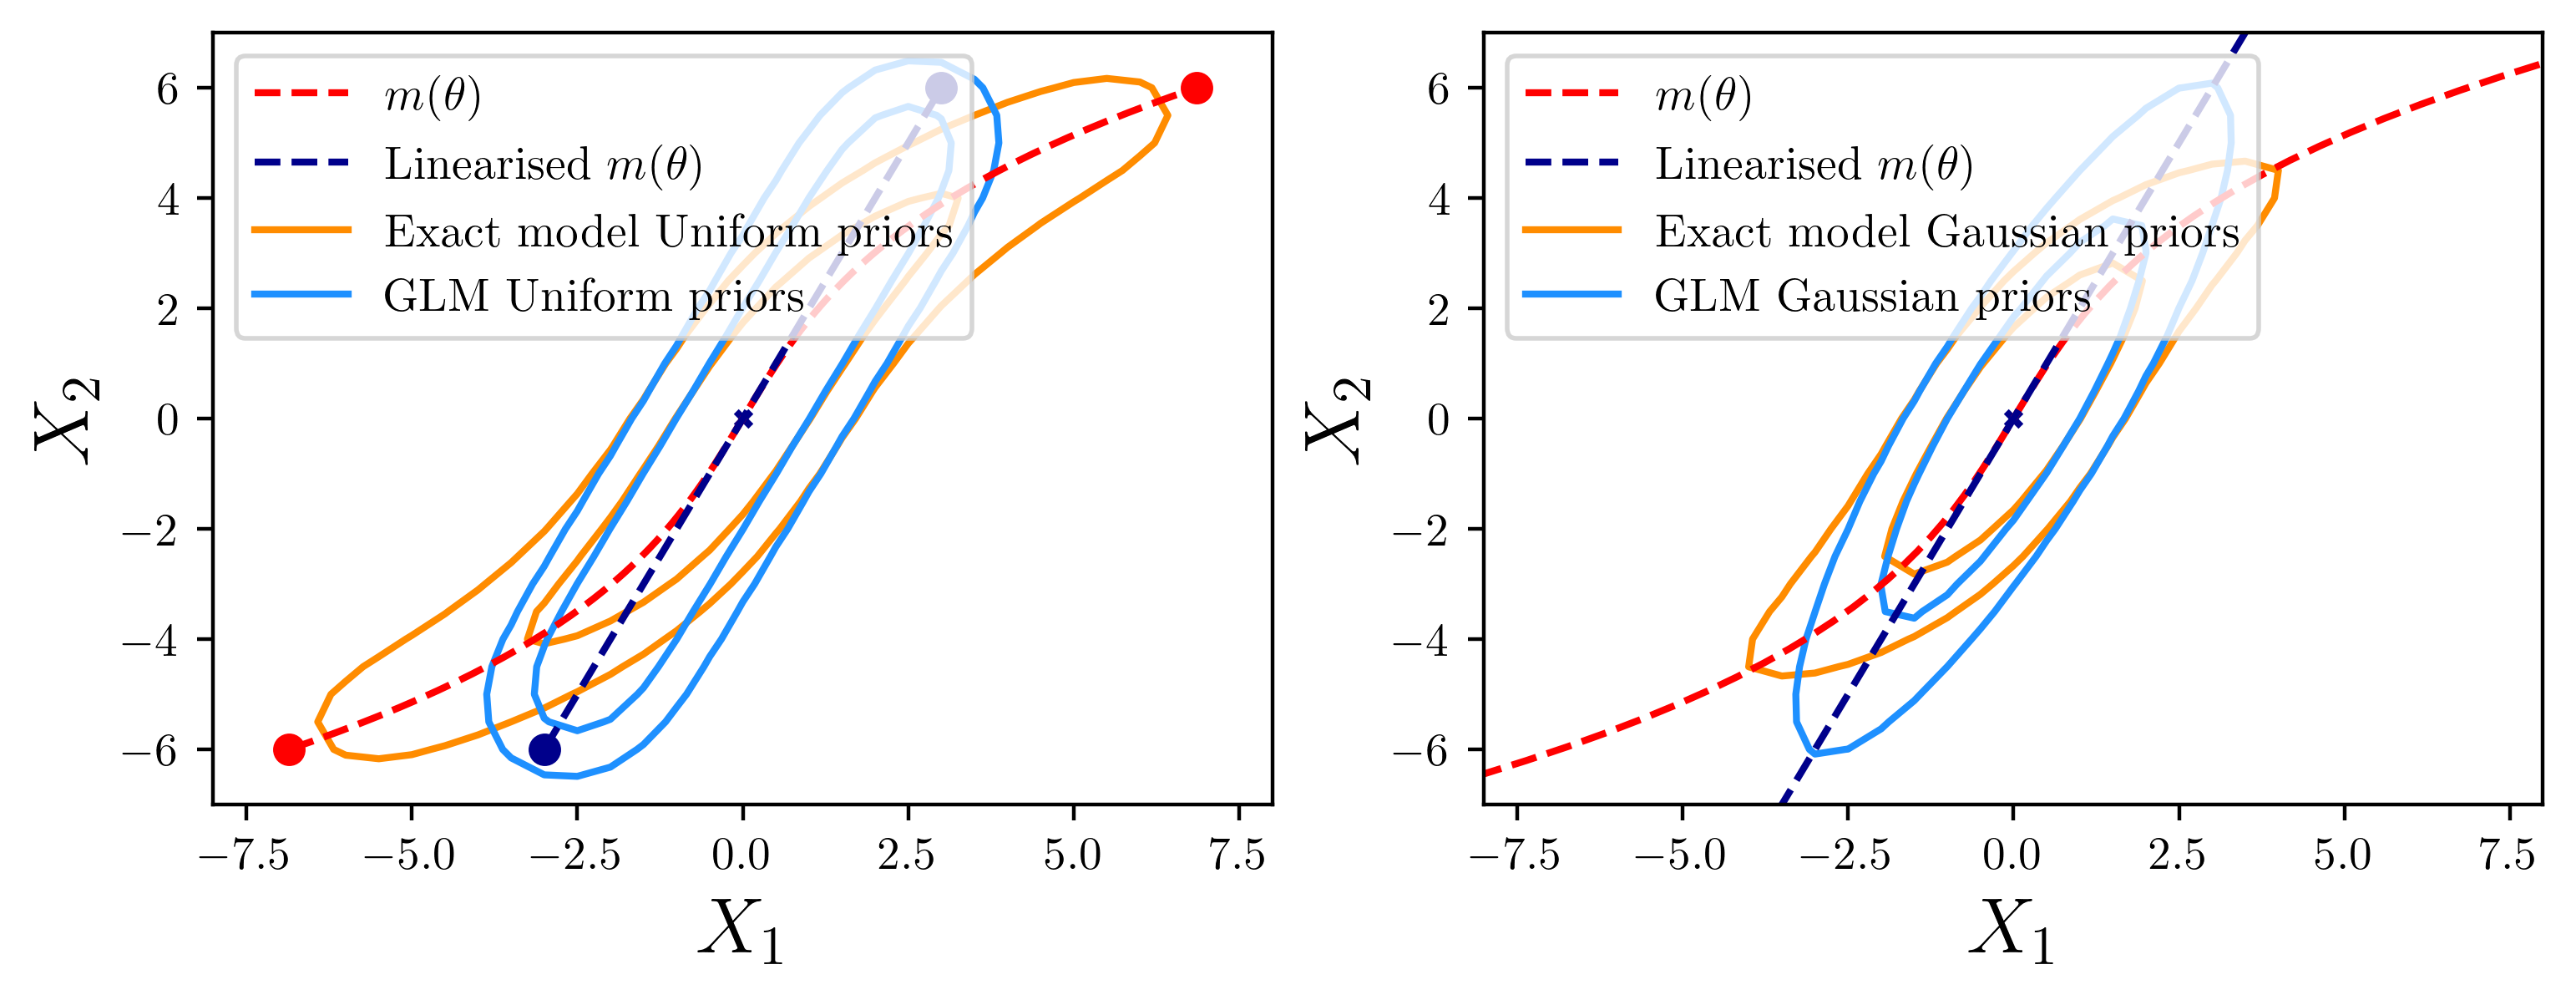

In [588]:
import os
os.environ["PATH"] += ":/global/common/software/nersc9/texlive/2024/bin/x86_64-linux"
plt.rcParams.update({
    "text.usetex": True,
    "font.family": 'serif'
})
fig,ax=plt.subplots(1,2, figsize=(9, 3),dpi=400)

#levels = np.array([0.9,0.93,0.95,0.97,1,1.03,1.07,1.2,1.4,1.6])

Evid=Evidence_Unif_map

levels = np.array([0,np.max(Evid)/3,np.max(Evid)*2/3,np.max(Evid)])
line_colors = ['darkorange' for l in cpf.levels]
cp = ax[0].contour(X,X, Evid, levels=levels, colors=line_colors)


Evid=Evidence_linear_Unif_map

levels = np.array([0,np.max(Evid)/3,np.max(Evid)*2/3,np.max(Evid)])
line_colors = ['dodgerblue' for l in cpf.levels]
cp = ax[0].contour(X,X, Evid, levels=levels, colors=line_colors)

Evid=Evidence_Gauss_map

levels = np.array([0,np.max(Evid)/3,np.max(Evid)*2/3,np.max(Evid)])
line_colors = ['darkorange' for l in cpf.levels]
cp = ax[1].contour(X,X, Evid, levels=levels, colors=line_colors)


Evid=Evidence_linear_Gauss_map

levels = np.array([0,np.max(Evid)/3,np.max(Evid)*2/3,np.max(Evid)])
line_colors = ['dodgerblue' for l in cpf.levels]
cp = ax[1].contour(X,X, Evid, levels=levels, colors=line_colors)



for i in range(2):
    xlim=[-10,10]
    ax[i].set_xlim(-8,8)
    ax[i].set_ylim(-7,7)

    ax[i].set_xlabel('$X_1$',fontsize=17)
    ax[i].set_ylabel('$X_2$',fontsize=17)
    if i==0:
        Theta=np.linspace(-3,3,80)
    else:
        Theta=np.linspace(-5,5,80)
    ax[i].plot(model(Theta)[0],model(Theta)[1],color='red',linestyle='--')
    model_linear_vec=np.array([model_linear(theta,mean_prior,model) for theta in Theta])

    ax[i].plot(model_linear_vec[:,0],model_linear_vec[:,1],color='darkblue',linestyle='--')

    ax[i].scatter(model(0)[0],model(0)[1],marker='x',s=10,color='darkblue')


ax[0].plot([-10],[-10],color='red',label=r'$m(\theta)$',linestyle='--')
ax[0].plot([-10],[-10],color='darkblue',label=r'Linearised $m(\theta)$',linestyle='--')
ax[0].plot([-10],[-10],color='darkorange',label='Exact model Uniform priors')
ax[0].plot([-10],[-10],color='dodgerblue',label='GLM Uniform priors')
ax[0].legend()

ax[1].plot([-10],[-10],color='red',label=r'$m(\theta)$',linestyle='--')
ax[1].plot([-10],[-10],color='darkblue',label=r'Linearised $m(\theta)$',linestyle='--')
ax[1].plot([-10],[-10],color='darkorange',label='Exact model Gaussian priors')
ax[1].plot([-10],[-10],color='dodgerblue',label='GLM Gaussian priors')
ax[1].legend()


ax[0].scatter(model_linear(-3,0,model)[0],(model_linear(-3,0,model))[1],marker='o',color='darkblue')
ax[0].scatter(model_linear(3,0,model)[0],(model_linear(3,0,model))[1],marker='o',color='darkblue')

ax[0].scatter(model(-3)[0],(model(-3))[1],marker='o',color='red')
ax[0].scatter(model(3)[0],(model(3))[1],marker='o',color='red')


plt.savefig('plot_GLM.png',bbox_inches='tight')

In [570]:
model(3)

array([6.85714286, 6.        ])

In [571]:
 model_linear(-3,0,model)

array([-3., -6.])